In [1]:
from environment import Environment
from utils import plot_env, load_env
import numpy as np
import matplotlib.pyplot as plt
import os
import ast

In [3]:
env_config_file = os.path.join('/home/georgy/Documents/Dayan_lab/PhD/bandits/maze/code/mazes', 'tolman.txt')
env_config      = load_env(env_config_file)
env             = Environment(**env_config)

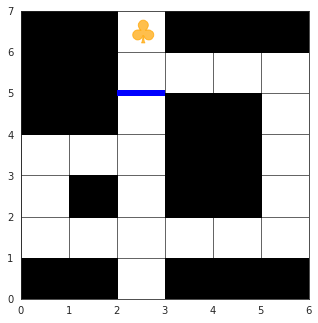

In [5]:
fig = plt.figure(figsize=(4, 4))
ax  = fig.add_axes([0, 0, 1, 1])
plot_env(ax, env)